# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202112 
## SECTION: Descriptive statistics
### VIDEO: Computing dispersion
#### TEACHER: Mike X Cohen, sincxpress.com

In [26]:
# import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
## create data from a distributions

N     = 10001  # number of data points
nbins = 25     # number of bins
shift = 10     # x shift
width = 3

d0 = width*np.random.randn(N) 
d1 = np.random.randn(N) 
d2 = width*np.random.randn(N) + shift

# extract x and y histogram values
# NOTE: size mismatch between x and y
# y contains bins counts (n), x bins edges (n+1)
y0,x0 = np.histogram(d0,nbins)
# average n+1 bin edges in n bin central values 
x0 = (x0[1:]+x0[:-1])/2
# nomralize count to 1
y0 = y0 / max(y0)

y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2
y1 = y1 / max(y1)

y3,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2
y2 = y2 / max(y2)

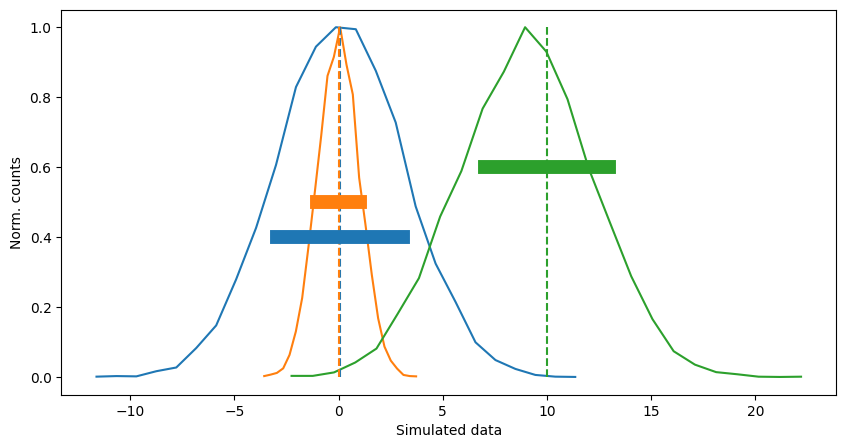

In [35]:

# compute means
mean_d0 = np.mean(d0)
mean_d1 = np.mean(d1)
mean_d2 = np.mean(d2)

# compute standard deviations
std_d0 = np.std(d0,ddof=1)
std_d1 = np.std(d1,ddof=1)
std_d2 = np.std(d2,ddof=1)

# define colors palette
c0, c1, c2 = ['#1f77b4', '#ff7f0e', '#2ca02c']

# plot distributions
plt.figure(figsize=(10,5))
plt.plot(x0,y0,c0, x1,y1,c1, x2,y2,c2)

# add mean vertical lines
plt.plot([mean_d0,mean_d0],[0,max(y0)], '--', c=c0)
plt.plot([mean_d1,mean_d1],[0,max(y1)], '--', c=c1)
plt.plot([mean_d2,mean_d2],[0,max(y2)], '--', c=c2)
# plt.plot([mean_d0,mean_d0],[0,max(y0)], '--',
#         [mean_d1,mean_d1],[0,max(y1)], '--',
#         [mean_d2,mean_d2],[0,max(y2)], '--')

# add std bars
plt.plot([mean_d0-std_d0,mean_d0+std_d0],
         [.4*max(y0),.4*max(y0)],
         linewidth=10)
plt.plot([mean_d1-std_d1,mean_d1+std_d1],
         [.5*max(y1),.5*max(y1)],
         linewidth=10)
plt.plot([mean_d2-std_d2,mean_d2+std_d2],
         [.6*max(y2),.6*max(y2)],
         linewidth=10)

plt.xlabel('Simulated data')
plt.ylabel('Norm. counts')
plt.show()

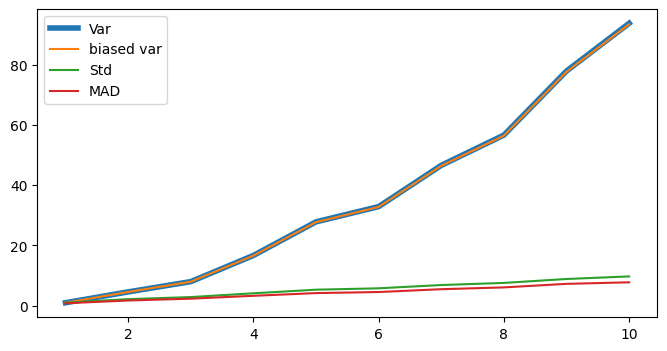

In [156]:
## different variance measures

variances = np.arange(1,11)
N = 300

varmeasures = np.zeros((4,len(variances)))

for i in range(len(variances)):
    
    # create data and mean-center
    data = np.random.randn(N) * variances[i]
    datacent = data - np.mean(data)
    
    # variance
    varmeasures[0,i] = sum(datacent**2) / (N-1)
    
    # "biased" variance
    varmeasures[1,i] = sum(datacent**2) / N
    
    # standard deviation
    varmeasures[2,i] = np.sqrt( sum(datacent**2) / (N-1) )
    
    # MAD (mean absolute difference)
    varmeasures[3,i] = sum(abs(datacent)) / (N-1)
    

# plot curves
plt.figure(figsize=(8,4))
plt.plot(variances,varmeasures.T[:,0], '-', lw=4)
plt.plot(variances,varmeasures.T[:,1], '-', lw=1.5)
plt.plot(variances,varmeasures.T[:,2:], '-', lw=1.5)
plt.legend(('Var','biased var','Std','MAD'))
plt.show()

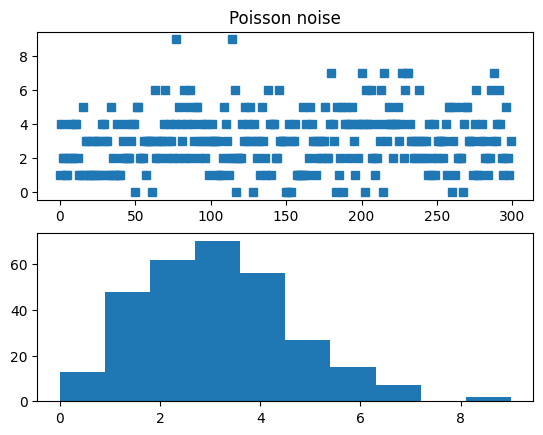

In [37]:
## Fano factor and coefficient of variation (CV)

# need positive-valued data (why?)
data = np.random.poisson(3,300)  # "Poisson noise"

fig,ax = plt.subplots(2,1)
ax[0].plot(data,'s')
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()

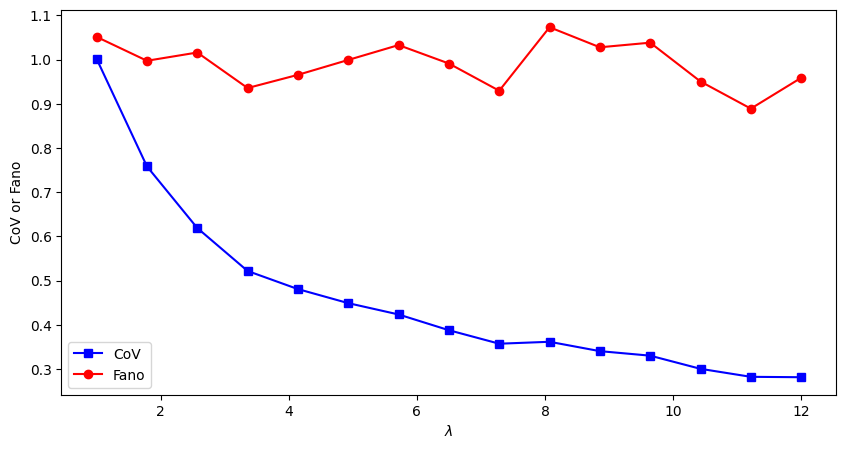

In [60]:
## Fano factor and coefficient of variation (CV)

## compute fano factor and CV for a range of lambda parameters

# parameter values
params = np.linspace(1,12,15)

# initialize output vectors
fano = np.zeros(len(params))
cv   = np.zeros(len(params))

for p in range(len(params)):
    
    # generate new data
    data = np.random.poisson(params[p],1000)
    
    # compute the metrics
    cv[p]   = np.std(data) / np.mean(data) # need ddof=1 here?
    fano[li] = np.var(data) / np.mean(data)


# plot
plt.figure(figsize=(10,5))
plt.plot(lambdas,cv,'bs-')
plt.plot(lambdas,fano,'ro-')
plt.legend(('CoV','Fano'), loc='lower left')
plt.xlabel('$\lambda$')
plt.ylabel('CoV or Fano')
plt.show()

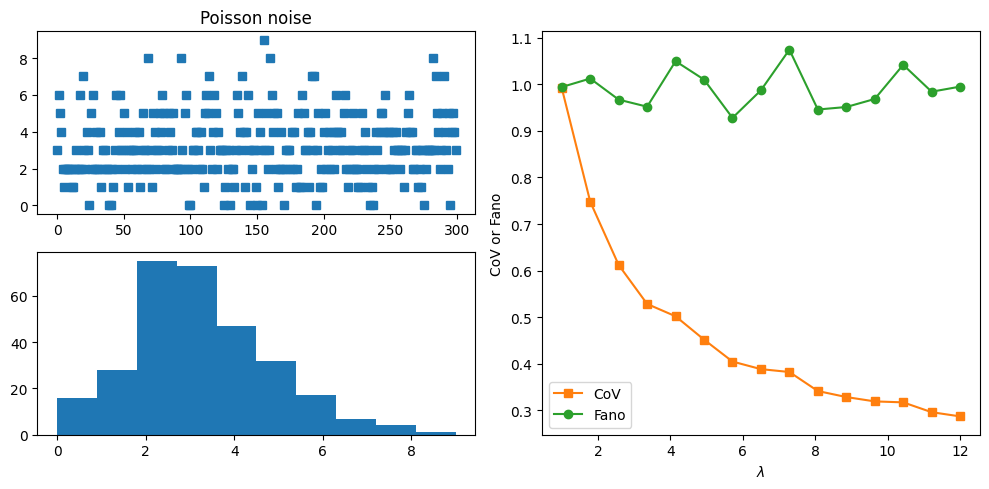

In [75]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# need positive-valued data (why?)
poisson_data = np.random.poisson(3,300)  # "Poisson noise"

## compute fano factor and CV for a range of lambda parameters

# parameter values
params = np.linspace(1,12,15)

# initialize output vectors
fano = np.zeros(len(params))
cv   = np.zeros(len(params))

for p in range(len(params)):
    
    # generate new data
    data = np.random.poisson(params[p],1000)
    
    # compute the metrics
    cv[p]   = np.std(data) / np.mean(data) # need ddof=1 here?
    fano[p] = np.var(data) / np.mean(data)

# plot
fig = plt.figure(figsize=(10, 5))

# create a grid to custom plot boxes
gs = gridspec.GridSpec(2, 2)
# define colors palette
c0, c1, c2 = ['#1f77b4', '#ff7f0e', '#2ca02c']

# create subplot 
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
ax2 = plt.subplot(gs[0:,1])

# plot
ax0.plot(poisson_data,'s', c=c0)
ax0.set_title('Poisson noise')
ax1.hist(poisson_data, color=c0)
ax2.plot(lambdas,cv,'s-', c=c1 )
ax2.plot(lambdas,fano,'o-', c=c2)
ax2.legend(('CoV','Fano'), loc='lower left')
ax2.set_xlabel('$\lambda$')
ax2.set_ylabel('CoV or Fano')

plt.tight_layout()
plt.show()